In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


### Neural Network

In [2]:
# Read feature dataset
train_feat = np.load("/Users/siya/Desktop/datasets/train/train_feature.npz", allow_pickle=True)
val_feat = np.load("/Users/siya/Desktop/datasets/valid/valid_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']
valid_feat_X = val_feat['features']
valid_feat_Y = val_feat['label']


In [3]:

# Flatten train and validation features using list comprehensions
train_feat = [i.flatten() for i in train_feat_X]
valid_feat = [i.flatten() for i in valid_feat_X]

# Convert to tensors
train_feat_X = torch.tensor(train_feat, dtype=torch.float32)
valid_feat_X = torch.tensor(valid_feat, dtype=torch.float32)
train_feat_Y = torch.tensor(train_feat_Y, dtype=torch.float32).unsqueeze(1)
valid_feat_Y = torch.tensor(valid_feat_Y, dtype=torch.float32).unsqueeze(1)


/var/folders/w7/stjx30757n5_hk7yzrbd5b8w0000gn/T/ipykernel_64499/4125594222.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  train_feat_X = torch.tensor(train_feat, dtype=torch.float32)


In [4]:

# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9984, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return torch.sigmoid(logits)

model = NeuralNetwork()


Epoch [5/20], Loss: 0.6933
Epoch [10/20], Loss: 0.6893
Epoch [15/20], Loss: 0.6833
Epoch [20/20], Loss: 0.6771
Validation Accuracy: 74.64%


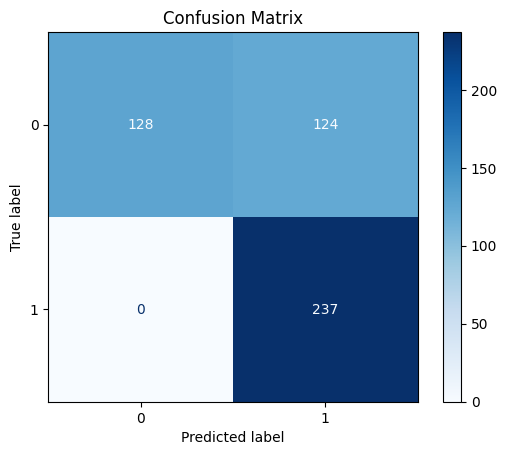

In [5]:

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, X, Y, optimizer, criterion, epochs=20):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Validation function
def validate(model, X, Y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        predicted = (outputs > 0.5).float()  # Convert probabilities to binary predictions
        accuracy = (predicted == Y).float().mean()
        print(f'Validation Accuracy: {accuracy.item() * 100:.2f}%')
        return predicted

# Train the model
train(model, train_feat_X, train_feat_Y, optimizer, criterion, epochs=20)

# Validate the model and get predictions
predicted_vals = validate(model, valid_feat_X, valid_feat_Y)

# Confusion Matrix
cm = confusion_matrix(valid_feat_Y.numpy(), predicted_vals.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
